In [37]:
import matplotlib as plt
import numpy as np

In [6]:
import pymysql
con = pymysql.connect("localhost","priyatam","7188","project" )


# prepare a cursor object using cursor() method
#cursor = db.cursor()

# execute SQL query using execute() method.
#cursor.execute("SELECT * from studmarks")

# Fetch a single row using fetchone() method.
#data = cursor.fetchall()
#print(data)
#cursor.close()

import pandas as pd
df = pd.read_sql_query("SELECT * from studmarks",con)
df.head(10)


# disconnect from server
#db.close()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [7]:
df.shape

(10, 11)

In [33]:
#check missing values in dataframe
df.isnull()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [8]:
df.dtypes

Name         object
Gender       object
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [9]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [15]:
df['Gender'].value_counts()

M    5
F    5
Name: Gender, dtype: int64

In [16]:
df['Gender'].value_counts()/len(df['Gender'])

M    0.5
F    0.5
Name: Gender, dtype: float64

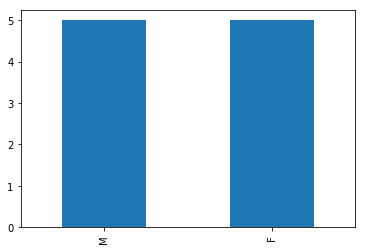

In [17]:
df['Gender'].value_counts().plot.bar()

# Corelation between continous variable and continous variable

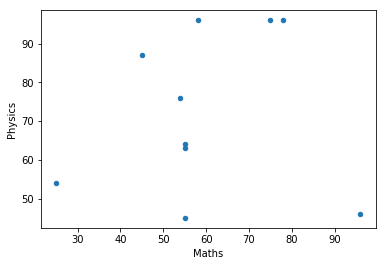

In [24]:
df.plot.scatter('Maths','Physics')

In [25]:
df.corr()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


# corelation between categorical variable and continous variable


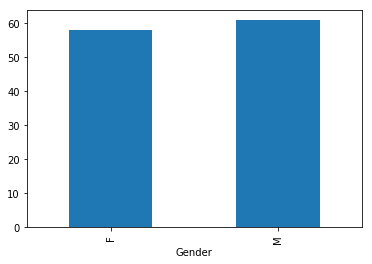

In [26]:
df.groupby('Gender')['Maths'].mean().plot.bar()

In [30]:
from scipy.stats import ttest_ind

In [28]:
males=df[df['Gender']=='M']
females=df[df['Gender']=='F']

In [29]:
ttest_ind(males['Maths'],females['Maths'],nan_policy='omit')

Ttest_indResult(statistic=0.21510477935205047, pvalue=0.8350680265113594)

# univariate outlier detection

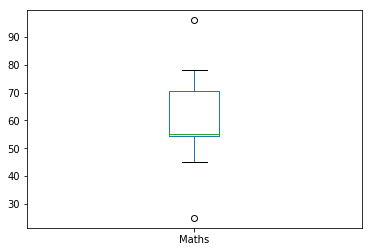

In [35]:
#checking outliers in variables
df['Maths'].plot.box()

# replacing outliers with mean of variable

In [38]:
df.loc[df['Maths']>90,'Maths']=np.mean(df['Maths'])

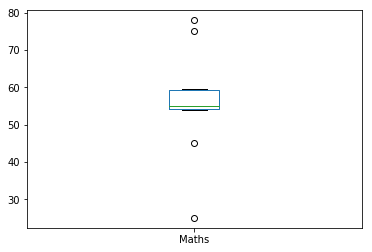

In [39]:
df['Maths'].plot.box()

# bivariate outlier detection

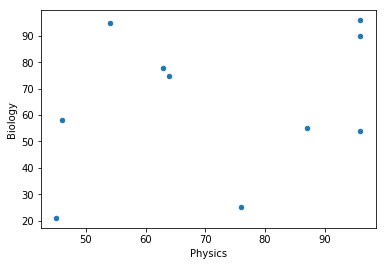

In [36]:
df.plot.scatter('Physics','Biology')